<a href="https://colab.research.google.com/github/obeabi/Automobile_Data_Set/blob/main/Auto_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Abiola Obembe
## Date: 2020-11-21
### Project Name : Automobile Dataest

#### Project Objective: Predict Car Price from 25 given attributes
##### Project Type : Regression

## Step 1: Data Uploading and Cleaning: Data Preprocessing

In [164]:
# import libraries
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("Installtion completed successfully!")

Installtion completed successfully!


In [165]:
# Import dataset and peruse first 10 rows
df = pd.read_csv('imports-85.data',header = None,  sep = ',')
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [166]:
# Include column names into dataframe

column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                'drive-wheels', 'engine-location', 'wheel-base','length', 'width', 'height',
                'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size','fuel-system',
                'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
                'highway-mpg','price']

print("The number of columns in my input column_names:" , len(column_names))

The number of columns in my input column_names: 26


In [167]:
# Join column names to dataframe
df.columns = column_names
df.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [168]:
# Check the shape of the dataframe and inspect for missing values

print( df.shape)
print("The number of rows in the original dataframe", df.shape[0])
print("The number of columns in the original dataframe", df.shape[1])

df.replace('?',np.nan, inplace= True)
df.head()

missing_values = df.isnull().sum().sum()

print("The total number of missing values" ,missing_values)


(205, 26)
The number of rows in the original dataframe 205
The number of columns in the original dataframe 26
The total number of missing values 59


In [169]:
# Print dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [170]:
# Investigate data types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [171]:
# Correct data format
df[['bore', 'stroke']] = df[['bore', 'stroke']].astype('float')
df[['normalized-losses', 'peak-rpm','horsepower']] = df[['normalized-losses', 'peak-rpm','horsepower']].astype('float')

In [172]:
# Drop missing values for target column price
Label = 'price'
print("The number of missing entries in the target of original column is", str(df[Label].isnull().sum()))

df.dropna( subset= ['price'], axis = 0, inplace= True)

print("The number of missing entries after dropping missing values in the target column is", str(df[Label].isnull().sum()))



The number of missing entries in the target of original column is 4
The number of missing entries after dropping missing values in the target column is 0


In [173]:
# reset index due to dropping of entries
df['price'] = df['price'].astype("float")
df.reset_index(drop = True, inplace= True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [174]:
# Select numerical columns and categorical columns from dataframe

num_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("The numerical columns in the dataframe are: ", num_columns)

cat_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print("The numerical columns in the dataframe are: " , cat_columns)

The numerical columns in the dataframe are:  Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')
The numerical columns in the dataframe are:  Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')


In [193]:
# Handle missing values for categorical columns in the dataframe

for cols in cat_columns:
  #print(" The Cradinality of columns named", cols, 'is', df[cols].nunique ())
  #print("The model for the column is", df[cols].mode().iloc[0])
  df[cols].replace(np.nan,df[cols].mode().iloc[0], inplace = True )

# Check of missing values are still present
df[cat_columns].isnull().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

In [195]:
# Handle missing values for numerical columns in the dataframe

for cols in num_columns:
  df[cols].replace(np.nan,df[cols].mean(), inplace = True )

# Check of missing values are still present
df[num_columns].isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [199]:
# Establish if there is missing value in the complete dataset

missing_values = df.isnull().sum().sum()

print("The number of missing values in dataframe is :", missing_values)
print("The shape of the dataframe without missing values is", df.shape)

The number of missing values in dataframe is : 0
The shape of the dataframe without missing values is (201, 26)


In [197]:
# Report Statical info of dataframe
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [203]:
# Check for correlation matric
df[num_columns].corr(method ='spearman')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.483960,-0.542030,-0.404203,-0.260553,-0.529907,-0.260517,-0.181819,-0.178442,-0.015937,0.020986,-0.004021,0.290138,-0.021918,0.050444,-0.142683
normalized-losses,0.483960,1.000000,-0.072600,0.045926,0.117695,-0.345880,0.123187,0.124089,-0.021328,0.099416,-0.067848,0.236603,0.241301,-0.258637,-0.209499,0.202034
wheel-base,-0.542030,-0.072600,1.000000,0.913120,0.815524,0.641402,0.764638,0.645661,0.536986,0.221315,-0.119545,0.495114,-0.316128,-0.484472,-0.531121,0.681790
length,-0.404203,0.045926,0.913120,1.000000,0.889761,0.532213,0.889759,0.779691,0.639137,0.178648,-0.180277,0.660012,-0.271673,-0.661012,-0.688778,0.810331
width,-0.260553,0.117695,0.815524,0.889761,1.000000,0.370636,0.858624,0.762966,0.607031,0.236914,-0.138980,0.681364,-0.213543,-0.673376,-0.692498,0.812097
height,-0.529907,-0.345880,0.641402,0.532213,0.370636,1.000000,0.362877,0.208611,0.221354,-0.027400,0.008056,0.021625,-0.279633,-0.079883,-0.137731,0.263806
curb-weight,-0.260517,0.123187,0.764638,0.889759,0.858624,0.362877,1.000000,0.874364,0.702222,0.156648,-0.213276,0.804234,-0.247198,-0.805613,-0.830918,0.913767
engine-size,-0.181819,0.124089,0.645661,0.779691,0.762966,0.208611,0.874364,1.000000,0.696128,0.292150,-0.233197,0.818438,-0.282721,-0.722111,-0.716830,0.828417
bore,-0.178442,-0.021328,0.536986,0.639137,0.607031,0.221354,0.702222,0.696128,1.000000,-0.084952,-0.168194,0.640812,-0.304192,-0.608772,-0.620782,0.646417
stroke,-0.015937,0.099416,0.221315,0.178648,0.236914,-0.027400,0.156648,0.292150,-0.084952,1.000000,-0.055001,0.135682,-0.071172,-0.018086,-0.015152,0.112829


## Step 2: Exploratory Data Analysis

(array([44., 45., 48., 24., 14., 16.,  5.,  4.,  0.,  1.]),
 array([ 48. ,  69.4,  90.8, 112.2, 133.6, 155. , 176.4, 197.8, 219.2,
        240.6, 262. ]),
 <a list of 10 Patch objects>)

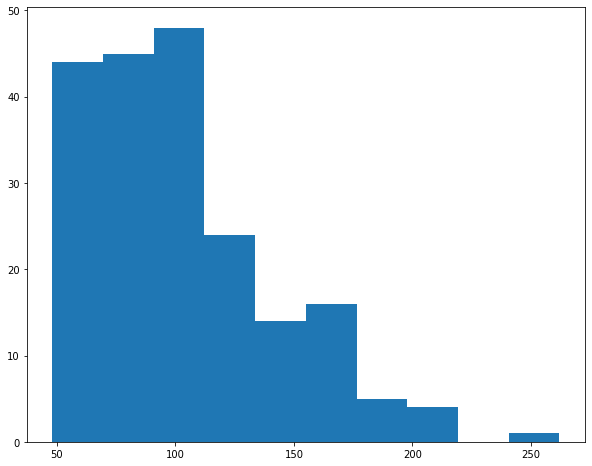

In [201]:
plt.hist(df['horsepower'])